# Group 17 - Code part

## Used extensions

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

# 1. Policies to stimulate Electic Vehicle sales


## Total passenger and EV count (Source: CBS)

In [2]:
file_path = "C:/Users/Nikos/Desktop/Programming Group Project/EV Stats/Total passenger vehicles NL.csv"
df_total = pd.read_csv(file_path)
df_total

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Nikos/Desktop/Programming Group Project/EV Stats/Total passenger vehicles NL.csv'

In [ ]:
file_path = "C:/Users/Nikos/Desktop/Programming Group Project/EV Stats/EV fleet NL.csv"
df_EV = pd.read_csv(file_path)
df_EV

In [ ]:
figure, ax = plt.subplots(figsize = (12,8))

x = df_total["year"]

ax.plot(x,df_total["count"],color = "red",label = "total")
ax.plot(x,df_EV["count"],color = "cyan", label = "EVs")
ax.set_title("Vehicle fleet in the Netherlands", fontsize = 30)
ax.set_xlabel("Year",fontsize = 20)
ax.set_ylabel("Number (x1000)",fontsize = 20)
ax.legend()
ax.grid()
plt.savefig('Vehicle-Fleet.png')
plt.show()

## Year-on-year growth

In [ ]:
figure, ax = plt.subplots(figsize = (12,8))

x = df_total["year"]

ax.plot(x,df_total["year-on-year growth (%)"],color = "red",label = "total")
ax.plot(x,df_EV["year-on-year growth (%)"],color = "cyan", label = "EVs")
ax.set_title("Year-on-year growth", fontsize = 30)
ax.set_xlabel("Year", fontsize = 20)
ax.set_ylabel("Percentage", fontsize = 20)
ax.legend()
ax.grid()
plt.savefig("YoY-Growth.png")
plt.show()

## Sale figures of new EVs (Source: Statista Market Insights)

In [ ]:
file_path = "C:/Users/Nikos/Desktop/Programming Group Project/EV Stats/EV Sales NL.csv"
df_EV_sales = pd.read_csv(file_path)
df_EV_sales

In [ ]:
figure, ax = plt.subplots(figsize = (16,8))

x = df_EV_sales["year"]
y = df_EV_sales["sales"]

ax.plot(x,y,color = "red")
ax.set_title("Yearly EV sales in the Netherlands", fontsize = 30)
ax.set_xlabel("Year",fontsize = 20)
ax.set_ylabel("Number (x1000)",fontsize = 20)
ax.grid()
plt.savefig("EV-Sales.png")
plt.show()

## Price of new EVs (Source: Statista Market insights)

In [ ]:
file_path = "C:/Users/Nikos/Desktop/Programming Group Project/EV Stats/EV Price NL.csv"
df_EV_price = pd.read_csv(file_path)
df_EV_price

In [ ]:
figure, ax = plt.subplots(figsize = (16,8))

x = df_EV_price["year"]
y = df_EV_price["price"]

ax.plot(x,y,color = "red")
ax.set_title("Average price of new EVs in the Netherlands", fontsize = 30)
ax.set_xlabel("Year",fontsize = 20)
ax.set_ylabel("Price (x1000 Euros)",fontsize = 20)
ax.grid()
plt.savefig("Average-Price.png")
plt.show()

## Emission Analysis 

In [3]:
df = pd.read_csv('85347ENG_UntypedDataSet_09102024_102938.csv', delimiter=';')

df.columns = df.columns.str.replace('"', '')


In [4]:
vehicle_type_mapping = {
    "A018928": "Total Vehicles",
    "A018943": "Passenger Cars",
    "A051770": "Heavy Commercial Vehicles",
    "A051769": "Light Commercial Vehicles"
}

pollutants_of_interest = ['CarbonDioxideCO2_1', 'DinitrogenOxideN2O_2', 'MethaneCH4_3', 'NitrogenOxidesNOx_6']
columns_to_keep = ['MeansOfTransport', 'Periods'] + pollutants_of_interest
data_filtered = df[columns_to_keep]

data_filtered['MeansOfTransport'] = data_filtered['MeansOfTransport'].replace(vehicle_type_mapping)

data_filtered['Year'] = data_filtered['Periods'].str[:4].astype(int)

C:\Users\20201528\AppData\Local\Temp\ipykernel_12956\1491029827.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['MeansOfTransport'] = data_filtered['MeansOfTransport'].replace(vehicle_type_mapping)
C:\Users\20201528\AppData\Local\Temp\ipykernel_12956\1491029827.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Year'] = data_filtered['Periods'].str[:4].astype(int)


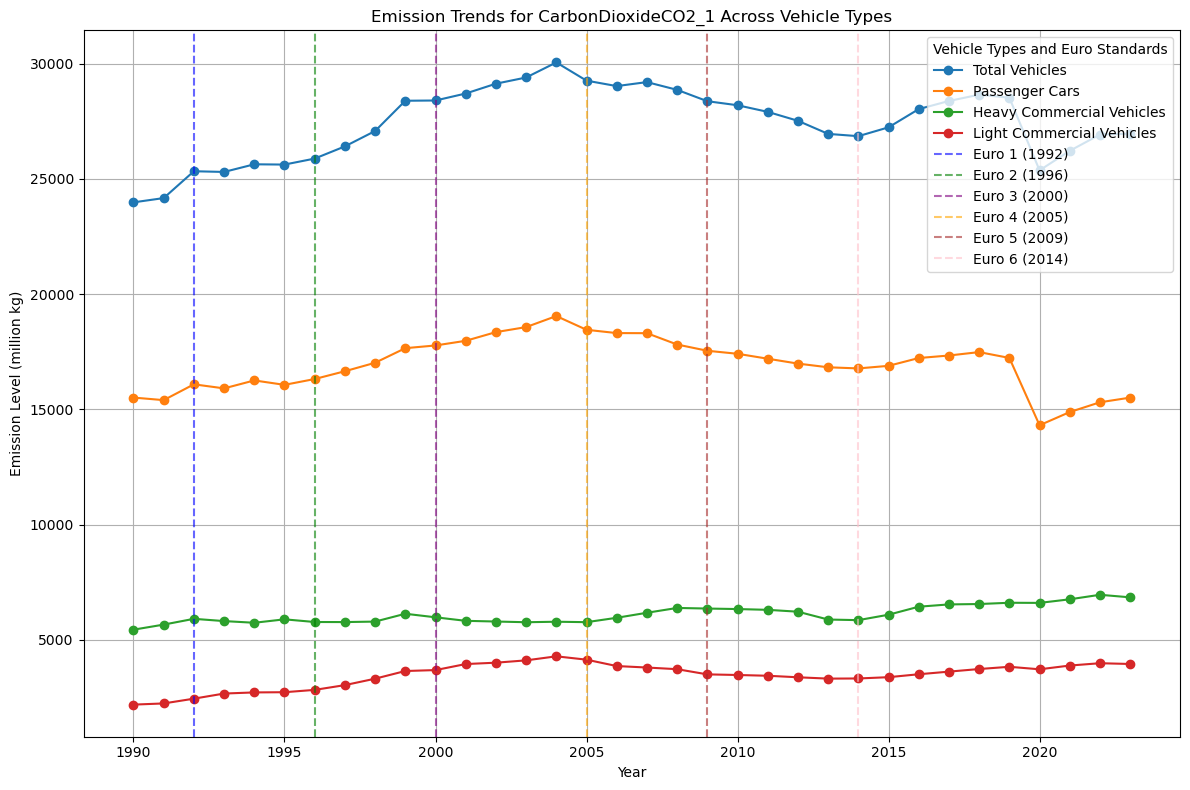

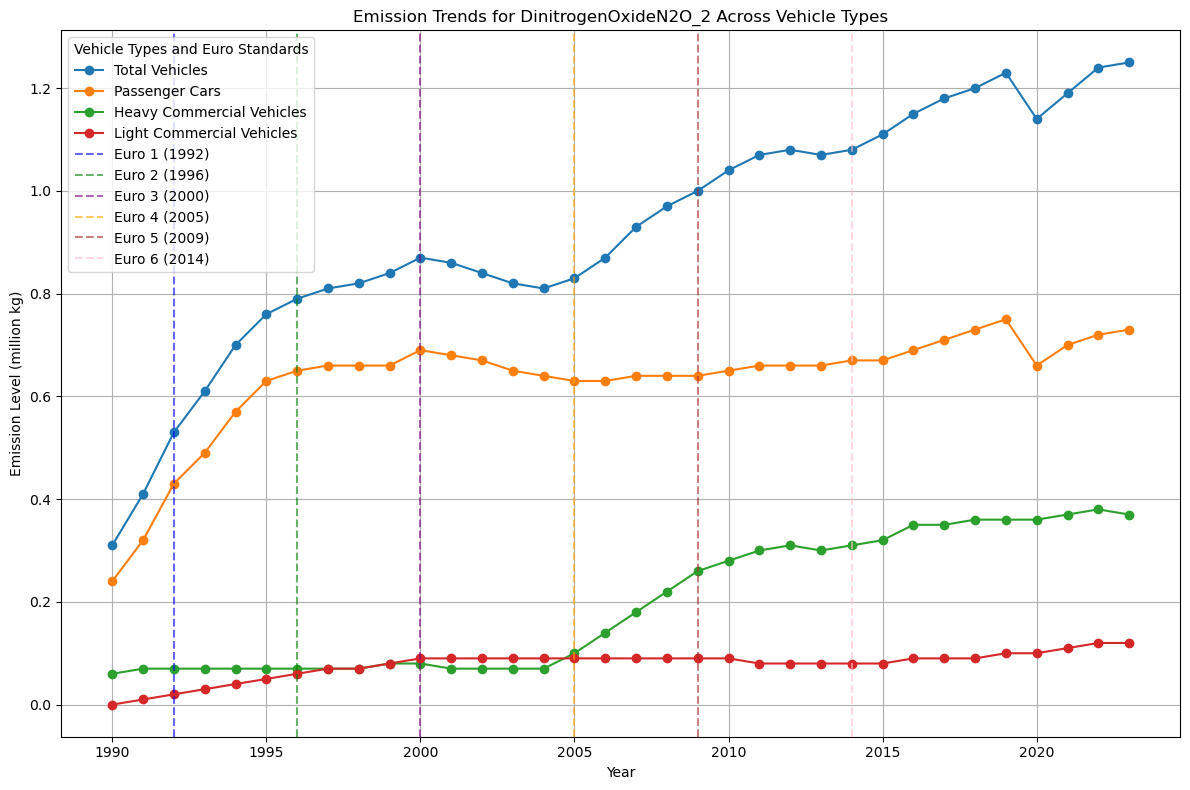

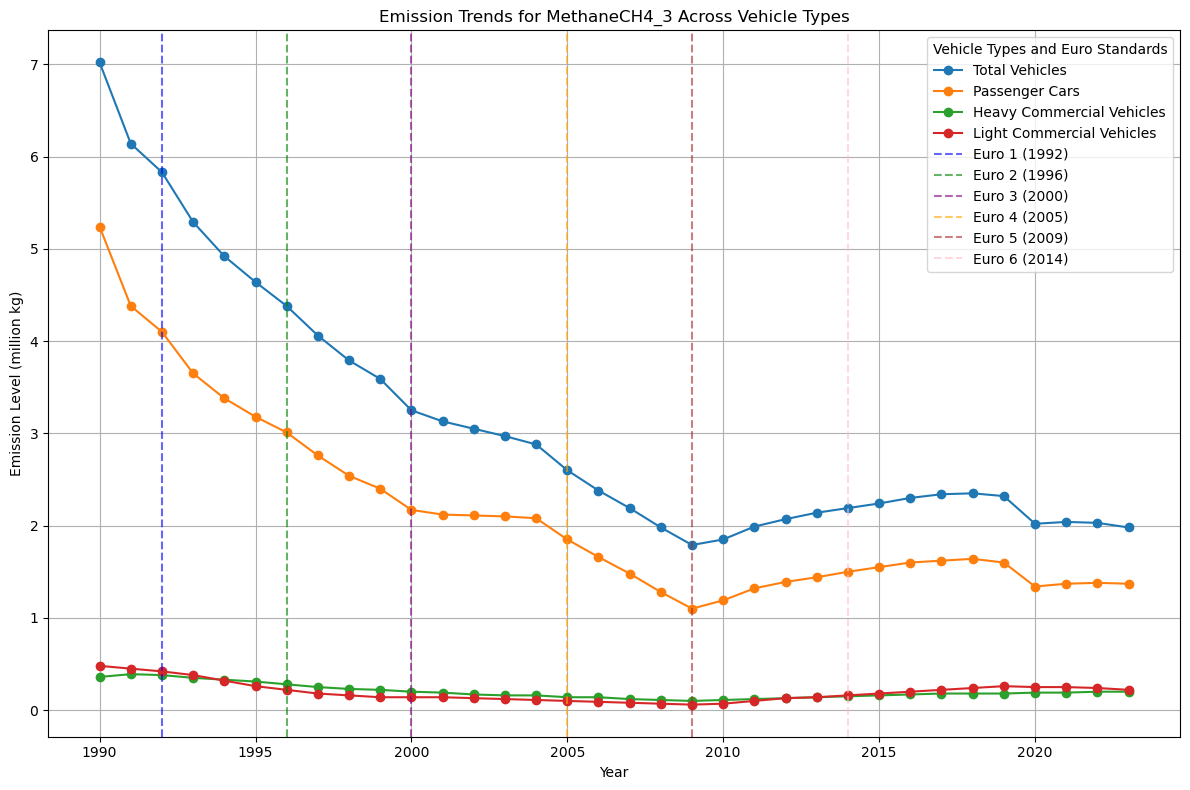

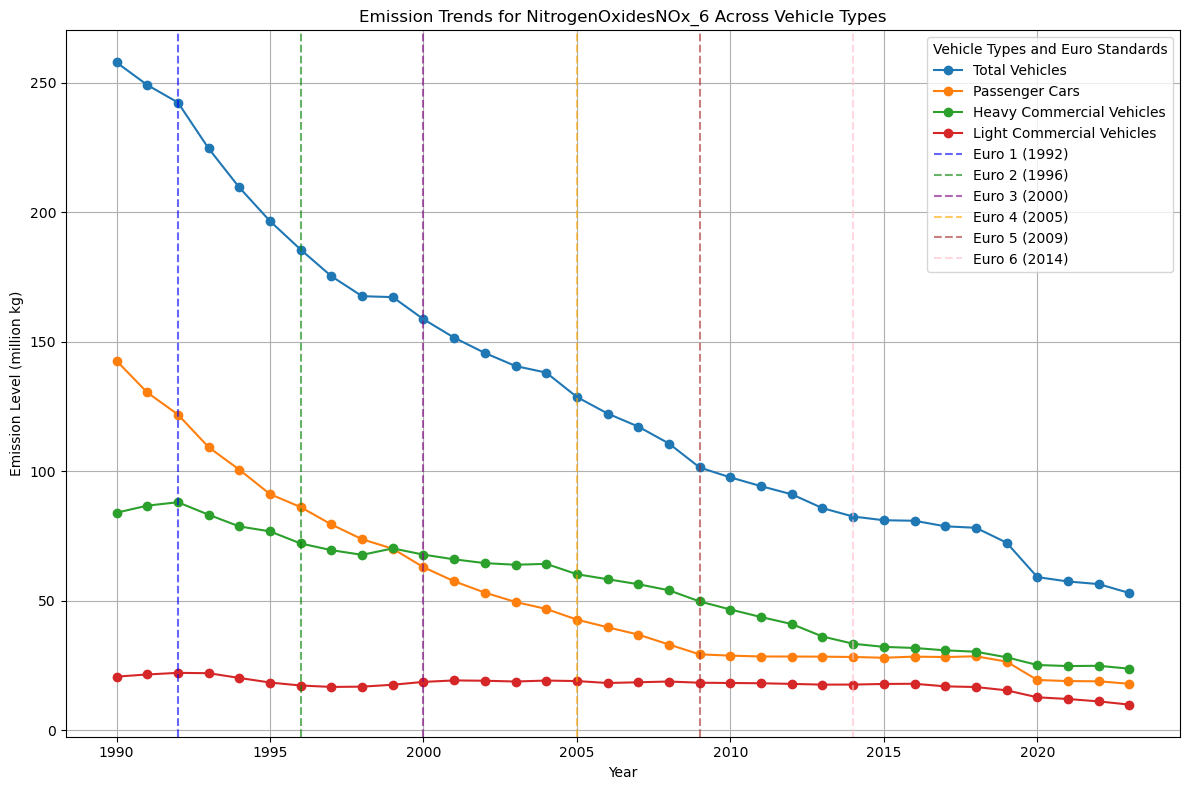

In [5]:

euro_years = {
    'Euro 1': 1992,
    'Euro 2': 1996,
    'Euro 3': 2000,
    'Euro 4': 2005,
    'Euro 5': 2009,
    'Euro 6': 2014
}

euro_colors = ['blue', 'green', 'purple', 'orange', 'brown', 'pink']  

def plot_vehicle_type_trends_by_pollutant(data, pollutant, vehicle_types, euro_years):
    plt.figure(figsize=(12, 8))
    
    for vehicle in vehicle_types:
        vehicle_data = data[data['MeansOfTransport'] == vehicle]
        plt.plot(vehicle_data['Year'], vehicle_data[pollutant], label=vehicle, marker='o')
    
    for (label, year), color in zip(euro_years.items(), euro_colors):
        plt.axvline(x=year, color=color, linestyle='--', alpha=0.6, label=f"{label} ({year})")

    plt.title(f"Emission Trends for {pollutant} Across Vehicle Types")
    plt.xlabel("Year")
    plt.ylabel("Emission Level (million kg)")
    plt.legend(title="Vehicle Types and Euro Standards")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

for pollutant in pollutants_of_interest:
    plot_vehicle_type_trends_by_pollutant(data_filtered, pollutant, vehicle_type_mapping.values(), euro_years)


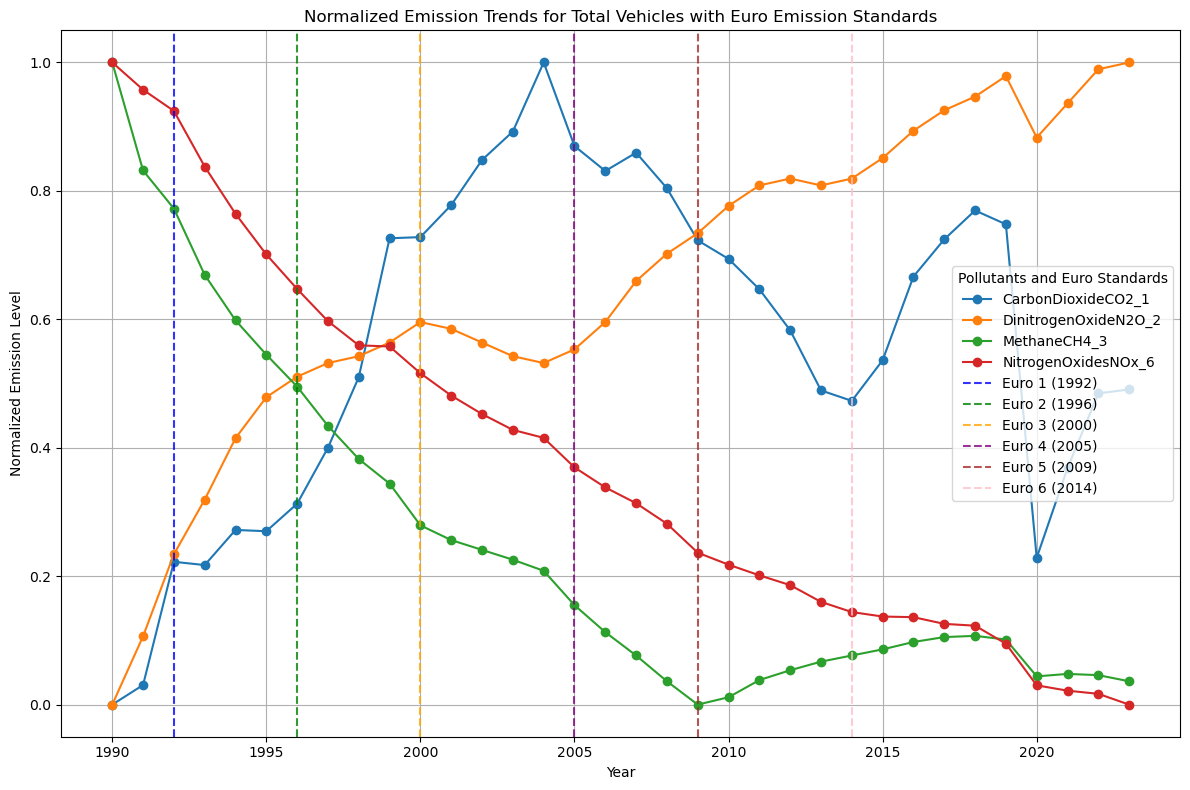

In [6]:

euro_years = {
    'Euro 1': 1992,
    'Euro 2': 1996,
    'Euro 3': 2000,
    'Euro 4': 2005,
    'Euro 5': 2009,
    'Euro 6': 2014
}

euro_colors = {
    'Euro 1': 'blue',
    'Euro 2': 'green',
    'Euro 3': 'orange',
    'Euro 4': 'purple',
    'Euro 5': 'brown',
    'Euro 6': 'pink'
}

total_vehicles_data = data_filtered[data_filtered['MeansOfTransport'] == 'Total Vehicles']

total_vehicles_data_normalized = total_vehicles_data.copy()
for pollutant in pollutants_of_interest:
    total_vehicles_data_normalized[pollutant] = (total_vehicles_data[pollutant] - total_vehicles_data[pollutant].min()) / (
        total_vehicles_data[pollutant].max() - total_vehicles_data[pollutant].min())

total_vehicles_data_normalized[['Year'] + pollutants_of_interest].tail()


plt.figure(figsize=(12, 8))


for pollutant in pollutants_of_interest:
    plt.plot(total_vehicles_data_normalized['Year'], total_vehicles_data_normalized[pollutant], label=pollutant, marker='o')

    
    
for label, year in euro_years.items():
    plt.axvline(x=year, color=euro_colors[label], linestyle='--', alpha=0.8, label=f"{label} ({year})")



plt.title("Normalized Emission Trends for Total Vehicles with Euro Emission Standards")
plt.xlabel("Year")
plt.ylabel("Normalized Emission Level")
plt.legend(title="Pollutants and Euro Standards")
plt.grid(True)
plt.tight_layout()
plt.show()


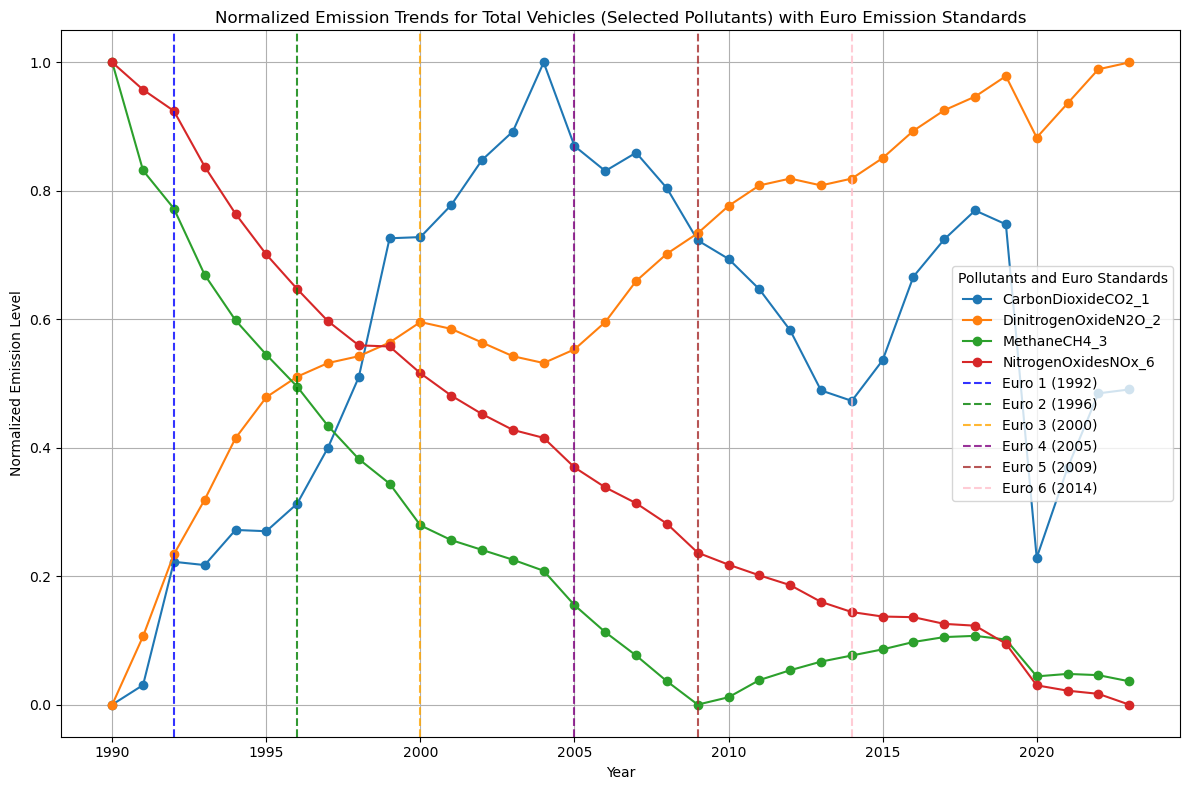

In [7]:
plt.figure(figsize=(12, 8))

for pollutant in pollutants_of_interest:
    plt.plot(total_vehicles_data_normalized['Year'], total_vehicles_data_normalized[pollutant], label=pollutant, marker='o')

for label, year in euro_years.items():
    plt.axvline(x=year, color=euro_colors[label], linestyle='--', alpha=0.8, label=f"{label} ({year})")

plt.title("Normalized Emission Trends for Total Vehicles (Selected Pollutants) with Euro Emission Standards")
plt.xlabel("Year")
plt.ylabel("Normalized Emission Level")
plt.legend(title="Pollutants and Euro Standards")
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

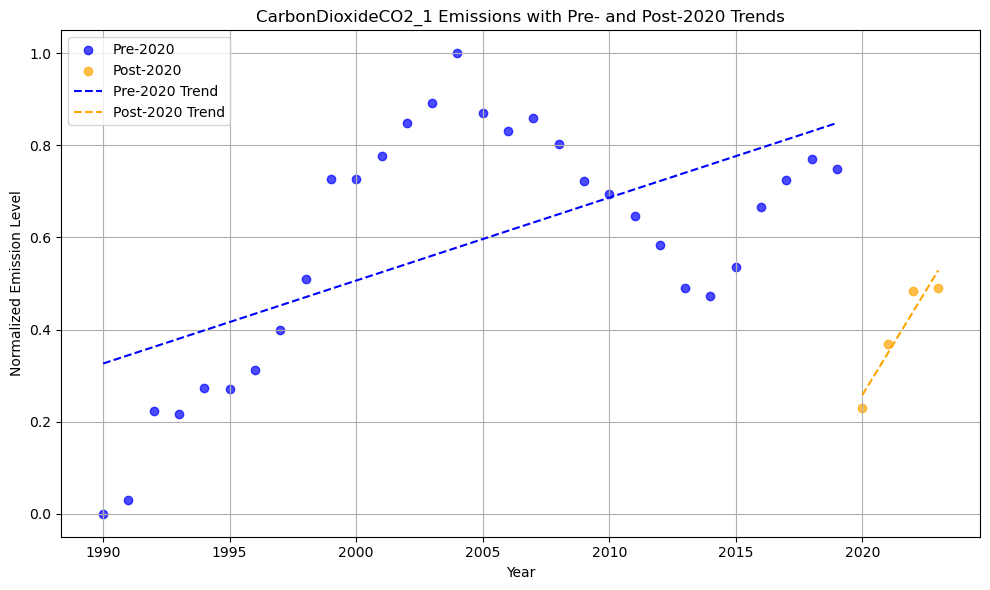

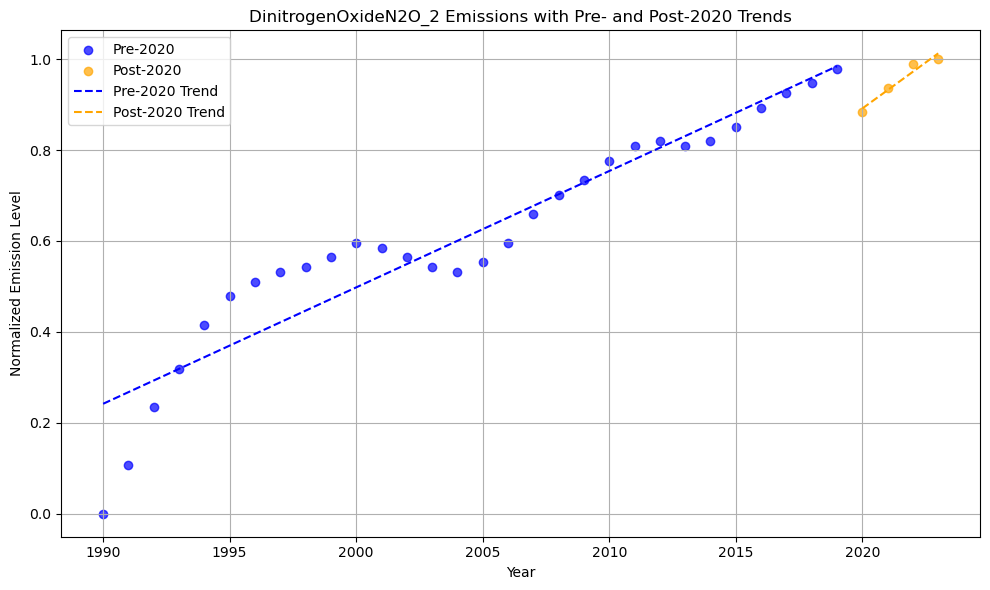

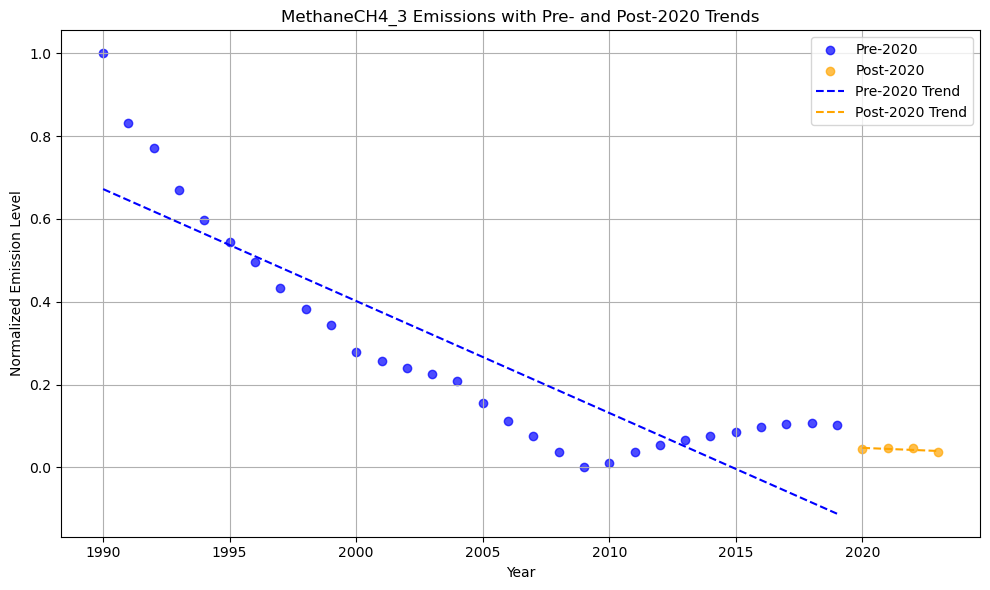

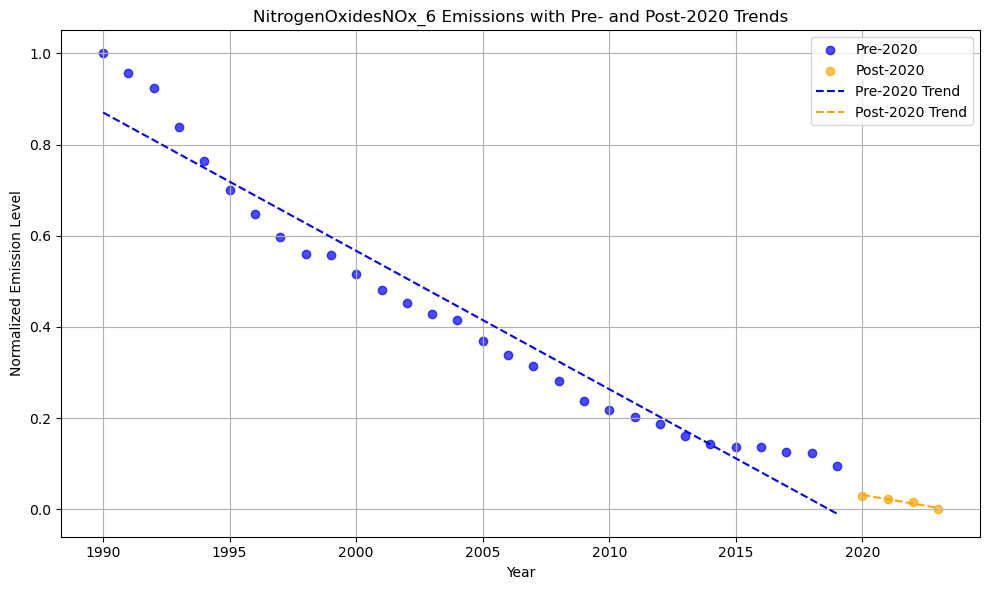

In [8]:
def scatter_plot_with_trend_lines(data, pollutants, breakpoint_year):
    plt.figure(figsize=(12, 8))
    
    for pollutant in pollutants:
        plt.figure(figsize=(10, 6))
        
        pre_data = data[data['Year'] < breakpoint_year]
        post_data = data[data['Year'] >= breakpoint_year]
        
        plt.scatter(pre_data['Year'], pre_data[pollutant], color='blue', label='Pre-2020', alpha=0.7)
        
        plt.scatter(post_data['Year'], post_data[pollutant], color='orange', label='Post-2020', alpha=0.7)
        
        if not pre_data.empty:
            z_pre = np.polyfit(pre_data['Year'], pre_data[pollutant], 1)
            p_pre = np.poly1d(z_pre)
            plt.plot(pre_data['Year'], p_pre(pre_data['Year']), color='blue', linestyle='--', label='Pre-2020 Trend')
        
        if not post_data.empty:
            z_post = np.polyfit(post_data['Year'], post_data[pollutant], 1)
            p_post = np.poly1d(z_post)
            plt.plot(post_data['Year'], p_post(post_data['Year']), color='orange', linestyle='--', label='Post-2020 Trend')
        
        plt.title(f"{pollutant} Emissions with Pre- and Post-2020 Trends")
        plt.xlabel("Year")
        plt.ylabel("Normalized Emission Level")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

scatter_plot_with_trend_lines(total_vehicles_data_normalized, pollutants_of_interest, breakpoint_year=2020)


<Figure size 1200x800 with 0 Axes>

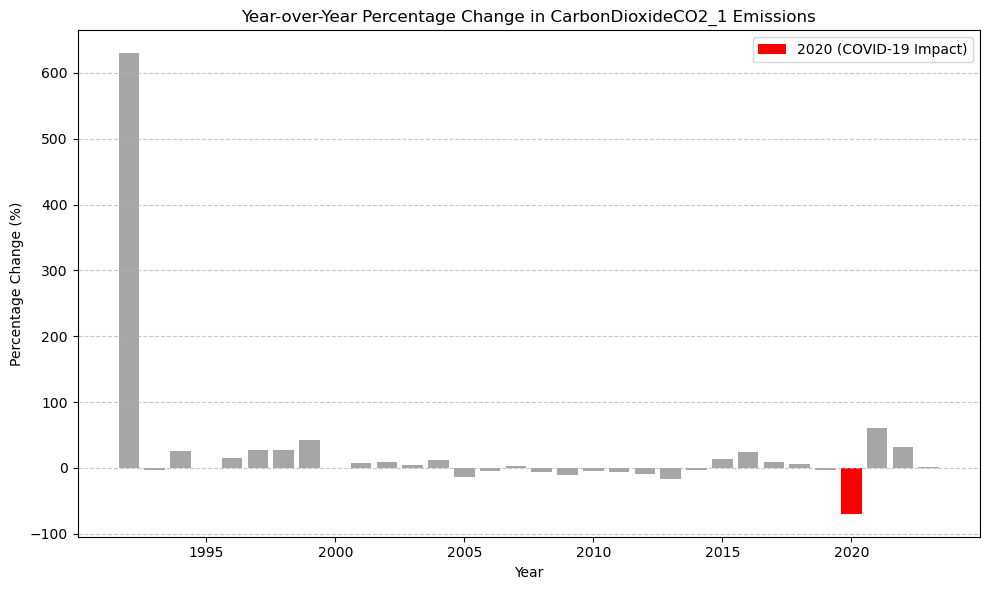

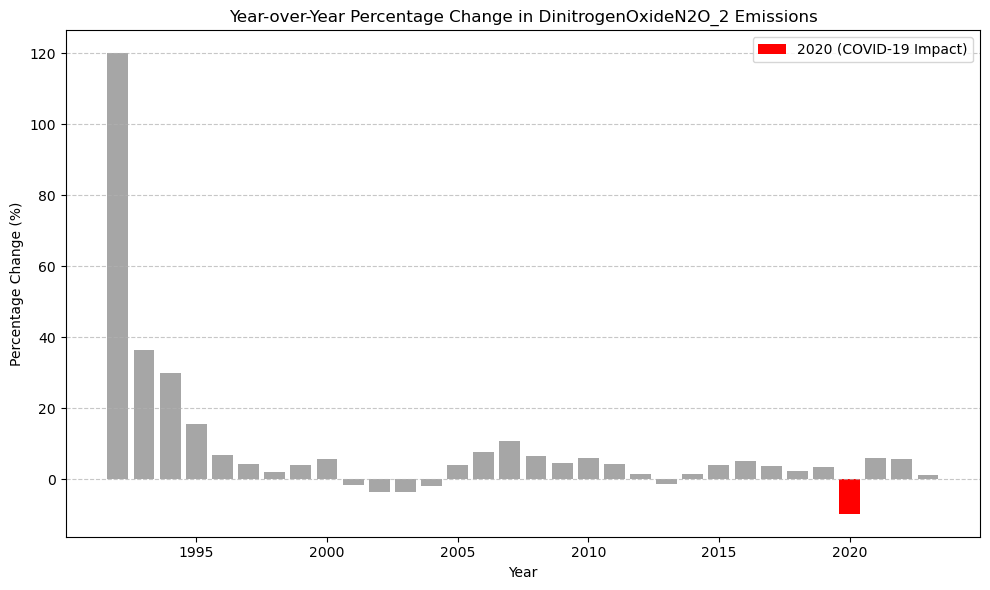

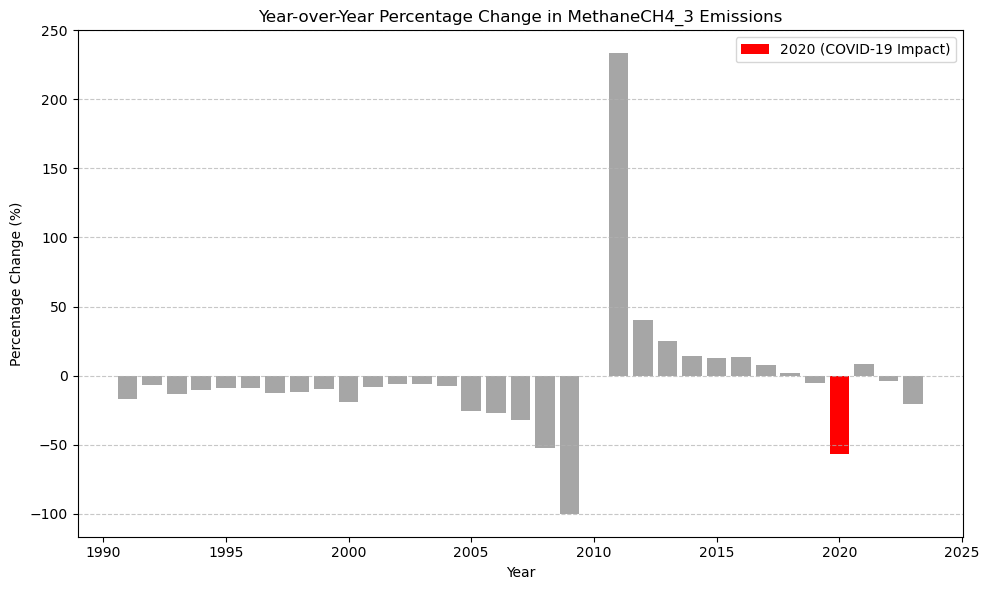

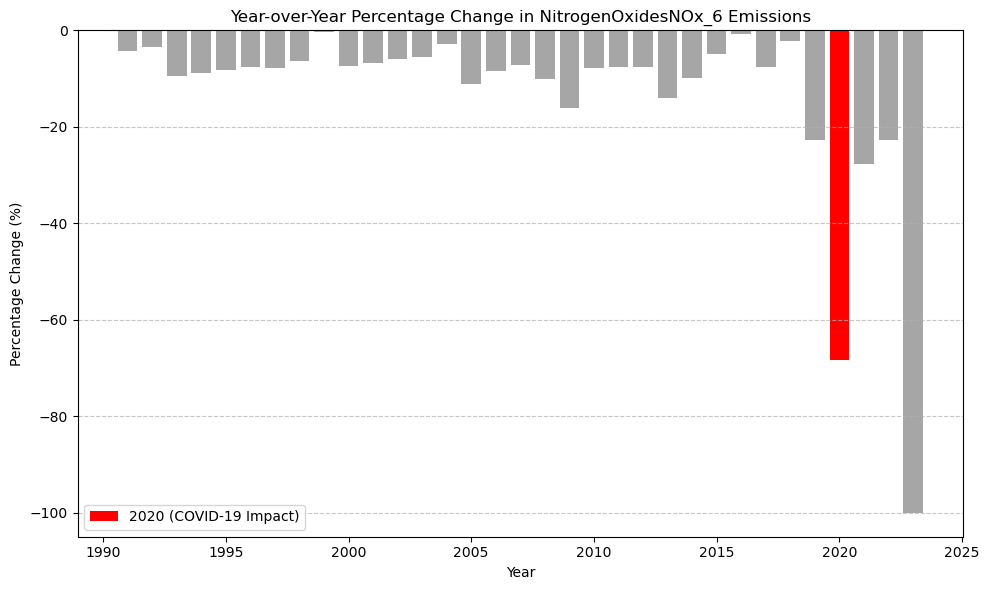

In [9]:
yearly_change_data = total_vehicles_data_normalized[['Year'] + pollutants_of_interest].copy()

for pollutant in pollutants_of_interest:
    yearly_change_data[f"{pollutant}_YoY_Change"] = yearly_change_data[pollutant].pct_change() * 100

plt.figure(figsize=(12, 8))
for pollutant in pollutants_of_interest:
    plt.figure(figsize=(10, 6))
    
    plt.bar(yearly_change_data['Year'], yearly_change_data[f"{pollutant}_YoY_Change"], color='grey', alpha=0.7)
    
    plt.bar(yearly_change_data[yearly_change_data['Year'] == 2020]['Year'], 
            yearly_change_data[yearly_change_data['Year'] == 2020][f"{pollutant}_YoY_Change"], 
            color='red', label='2020 (COVID-19 Impact)')
    
    plt.title(f"Year-over-Year Percentage Change in {pollutant} Emissions")
    plt.xlabel("Year")
    plt.ylabel("Percentage Change (%)")
    plt.legend()
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
